In [1]:
! pip install wandb

     |████████████████████████████████| 2.1MB 3.9MB/s 
     |████████████████████████████████| 133kB 19.9MB/s 
     |████████████████████████████████| 102kB 8.4MB/s 
     |████████████████████████████████| 163kB 18.6MB/s 
     |████████████████████████████████| 71kB 7.3MB/s 
  Created wheel for subprocess32: filename=subprocess32-3.5.4-cp37-none-any.whl size=6489 sha256=f0e901175a46d94b092f993131e05eeedee47078760f11a149c0886ed4ae530d
  Stored in directory: /root/.cache/pip/wheels/68/39/1a/5e402bdfdf004af1786c8b853fd92f8c4a04f22aad179654d1
  Created wheel for pathtools: filename=pathtools-0.1.2-cp37-none-any.whl size=8786 sha256=371845b9ac2dd7e129d051d13bfafccb751026c7a99a79a1780925781d6e9611
  Stored in directory: /root/.cache/pip/wheels/0b/04/79/c3b0c3a0266a3cb4376da31e5bfe8bba0c489246968a68e843
Successfully built subprocess32 pathtools


In [2]:
import wandb

In [3]:
import numpy as np
import math
import os
import random
import cv2
import matplotlib.pyplot as plt
from keras.utils import to_categorical
import tensorflow as tf

from keras import Input, regularizers, Model
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.resnet import ResNet50
from keras.applications.xception import Xception
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, AveragePooling2D, Dropout, BatchNormalization, GlobalAveragePooling2D

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
!ls /content/drive/MyDrive/demo_augumentation/Fungi | wc -l

1177


In [7]:
dir_train = "/content/drive/MyDrive/demo_augumentation"
# dir_train = "/content/drive/MyDrive/nature_12k_new/inaturalist_12K/train"
dir_val = "/content/drive/MyDrive/nature_12k_new/inaturalist_12K/val"
class_list = os.listdir(dir_train)
if '.DS_Store' in class_list:
  class_list.remove('.DS_Store')
class_list

['Reptilia',
 'Mollusca',
 'Animalia',
 'Amphibia',
 'Aves',
 'Mammalia',
 'Insecta',
 'Plantae',
 'Arachnida',
 'Fungi']

In [8]:
num_per_cls = 400

In [9]:
  x_amp_train = []
  x_amp_test = []

  y_amp_train = []
  y_amp_test = []

  # num_per_cls = config.epochs
    
  for i in range(len(class_list)):
    dir = dir_train+"/"+class_list[i]
    #img_name = random.choices(os.listdir(dir), k=(num_per_cls+math.ceil(0.1*num_per_cls)))
    img_name = random.sample(os.listdir(dir), k=(num_per_cls+math.ceil(0.1*num_per_cls)))
    for inc in range(num_per_cls):
      # print(inc)
      # print(img_name[inc])
      img = cv2.resize(cv2.imread(os.path.join(dir, img_name[inc])), (350,350))
      # print(type(img))
      if img is not None:
          x_amp_train.append(img)
          y_amp_train.append(i)

        # print("----------------------------------------")
    for inc in range(num_per_cls, num_per_cls+math.ceil(0.1*num_per_cls)):
      # print(inc)
      # print(img_name[inc])
      img = cv2.resize(cv2.imread(os.path.join(dir, img_name[inc])), (350,350))
      if img is not None:
          x_amp_test.append(img)
          y_amp_test.append(i)
    print(len(x_amp_train), len(x_amp_test))

400 40
800 80
1200 120
1600 160
2000 200
2400 240
2800 280
3200 320
3600 360
4000 400


In [10]:
    y_amp_train = to_categorical(y_amp_train)
    y_amp_test = to_categorical(y_amp_test)

In [11]:
    x_amp_train = np.array(x_amp_train)
    x_amp_test = np.array(x_amp_test) 

In [12]:
x_amp_train.shape

(4000, 350, 350, 3)

In [13]:
x_test = []
y_test = []

  # num_per_cls = config.epochs
    
for i in range(len(class_list)):
  dir = dir_val+"/"+class_list[i]
  #img_name = random.choices(os.listdir(dir), k=(num_per_cls+math.ceil(0.1*num_per_cls)))
  img_name = os.listdir(dir)
  for inc in range(len(img_name)):
    # print(inc)
    # print(img_name[inc])
    img = cv2.resize(cv2.imread(os.path.join(dir, img_name[inc])), (350,350))
    # print(type(img))
    if img is not None:
        x_test.append(img)
        y_test.append(i)
  #      # print("----------------------------------------")
  # for inc in range(num_per_cls, num_per_cls+math.ceil(0.1*num_per_cls)):
  #   # print(inc)
  #   # print(img_name[inc])
  #   img = cv2.resize(cv2.imread(os.path.join(dir, img_name[inc])), (350,350))
  #   if img is not None:
  #       x_no_aug_test.append(img)
  #       y_no_aug_test.append(i)
  print(len(x_test), len(y_test))

200 200
400 400
601 601
801 801
1001 1001
1201 1201
1401 1401
1602 1602
1802 1802
2002 2002


In [23]:
y=np.zeros(len(y_test))

In [25]:
for i in range(0,len(y_test)):
  y[i]=np.argmax(y_test[i])


In [30]:
y=y.astype(int)

In [14]:
y_test = to_categorical(y_test)
x_test = np.array(x_test) 

**For Manually Trained CNN Model**

In [70]:
    # Initialize a new wandb run
    wandb.init(project="Convolution_Neural_Network_modules")
    
    filter_no=16
    model = Sequential()
    model.add(Conv2D(filter_no, kernel_size=5, activation="relu",input_shape=(350, 350, 3)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding="same"))
    model.add(Dropout(0.25))
    for i in range(5):
      filter_no=math.ceil(filter_no*2)
      if(filter_no < 8 or filter_no > 256 ):
        filter_no=16
      model.add(Conv2D(filter_no, kernel_size=5, activation="relu"))
      model.add(BatchNormalization())
      model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding="same"))
      model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(10, activation="softmax", kernel_regularizer=regularizers.l2(0.01)))
    model = tf.keras.Model(inputs=model.inputs, outputs=model.layers[-1].output)

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history=model.fit(x_amp_train, y_amp_train, validation_data=(x_amp_test, y_amp_test), epochs=20, batch_size=16)

    

    #accuracy, loss, val_accuracy, val_loss = history.history['accuracy'], history.history['loss'], history.history['val_accuracy'], history.history['val_loss']

    # wandb.log({'val_loss' : val_loss, 'val_accuracy': val_accuracy})

    # for i in range(5):
    #   wandb.log({'val_loss' : val_loss[i], 'val_accuracy': val_accuracy[i],'loss' : loss[i], 'accuracy': accuracy[i], 'epoch': i})
    # wandb.finish()

Epoch 1/20
250/250 [==============================] - 38s 141ms/step - loss: 3.9577 - accuracy: 0.1071 - val_loss: 3.2059 - val_accuracy: 0.1250
Epoch 2/20
250/250 [==============================] - 35s 139ms/step - loss: 3.3073 - accuracy: 0.1317 - val_loss: 3.0011 - val_accuracy: 0.1325
Epoch 3/20
250/250 [==============================] - 35s 139ms/step - loss: 2.9871 - accuracy: 0.1489 - val_loss: 2.8709 - val_accuracy: 0.1350
Epoch 4/20
250/250 [==============================] - 35s 139ms/step - loss: 2.7116 - accuracy: 0.2087 - val_loss: 2.6549 - val_accuracy: 0.1650
Epoch 5/20
250/250 [==============================] - 35s 139ms/step - loss: 2.5608 - accuracy: 0.2025 - val_loss: 2.6685 - val_accuracy: 0.1350
Epoch 6/20
250/250 [==============================] - 35s 139ms/step - loss: 2.4300 - accuracy: 0.2183 - val_loss: 2.3994 - val_accuracy: 0.2275
Epoch 7/20
250/250 [==============================] - 35s 139ms/step - loss: 2.3292 - accuracy: 0.2258 - val_loss: 2.5305 - val_ac

In [71]:
results = model.evaluate(x_test, y_test, batch_size=128)
print("test_loss:", results[0])
print("test_accuracy:",results[1])

16/16 [==============================] - 12s 467ms/step - loss: 2.4395 - accuracy: 0.2013
test_loss: 2.4395132064819336
test_accuracy: 0.20129869878292084


In [42]:
input = np.array([x_test[0]])

_runtime,49
_timestamp,1618508085
_step,29


_runtime,▁▁▁▁▁▂▂▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▆▆▆▆▇▇██
_timestamp,▁▁▁▁▁▂▂▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▆▆▆▆▇▇██
_step,▁▁▁▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▇▇▇▇███


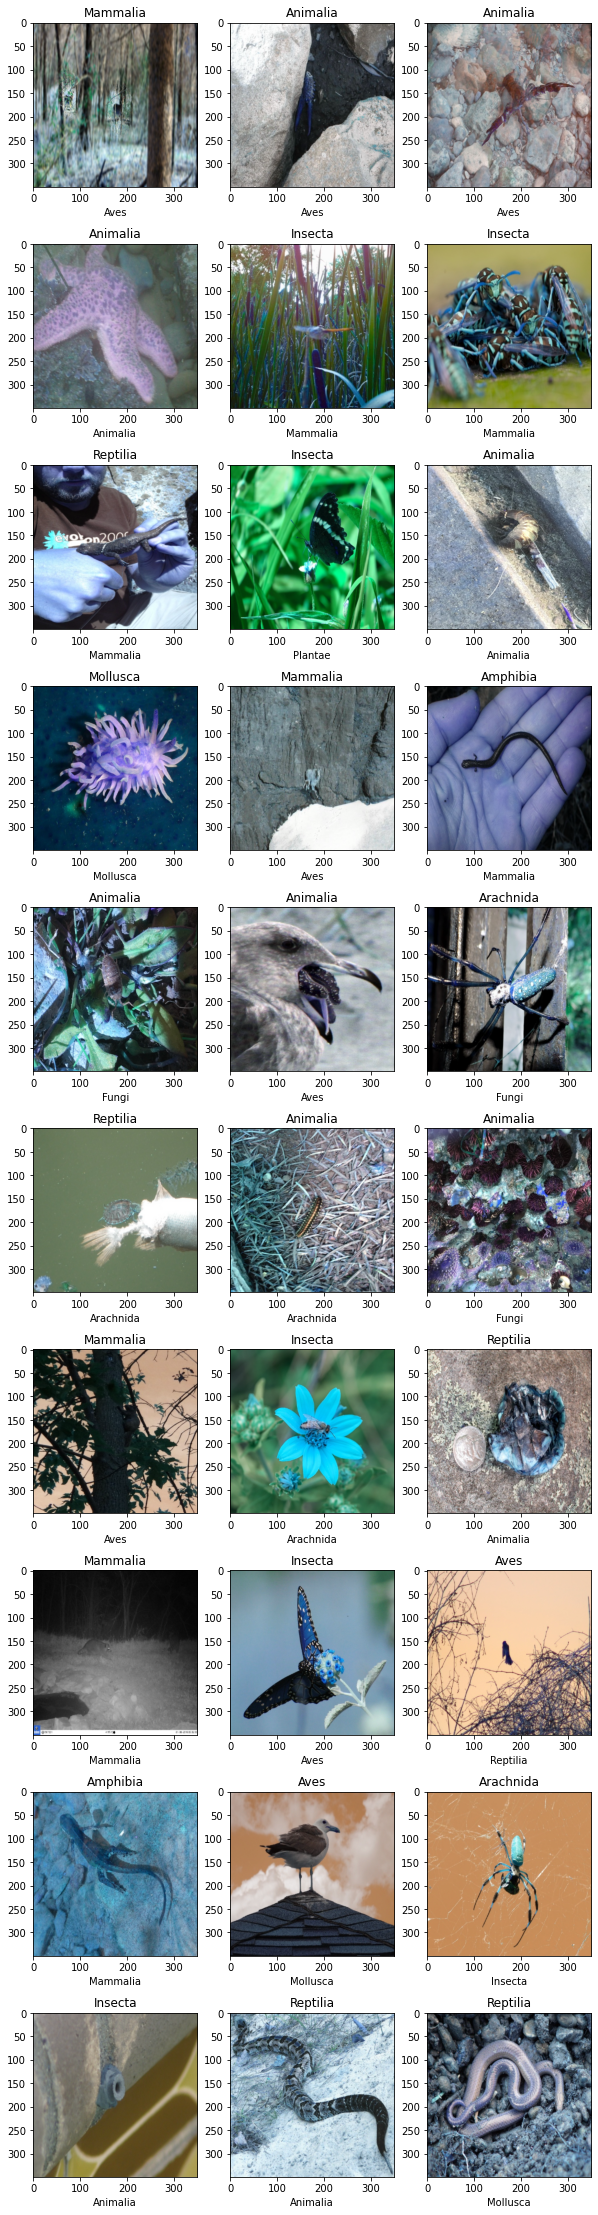

In [72]:
wandb.init(project="Convolution_Neural_Network_modules")
plt.figure(figsize=(10,40))
for k in range(30):
  imG=np.random.randint(0,2002)
  inp=np.array([x_test[imG]])
  yhat=model.predict(inp)
  img=plt.subplot(10, 3,k+1)
  img.set_title(class_list[y[imG]])
  img.set_xlabel(class_list[np.argmax(yhat)])
  xyz=plt.imshow(x_test[imG],cmap='gray')
  wandb.log({"img": [wandb.Image(xyz)]})

wandb.finish()
#plt.show()

**For Pre-trained Model**

In [ ]:
    # # Initialize a new wandb run
    # wandb.init(project="Fine_tuning_of_Pretrained_models")

    # new_input = Input(shape=(350, 350, 3))
    # model = Xception(weights='imagenet',include_top=False , input_tensor=new_input, pooling='avg')
    # output = Dense(10, activation="softmax", kernel_regularizer=regularizers.l2(0.01))(model.layers[-1].output)
    # # define new model
    # model= tf.keras.Model(inputs=model.inputs, outputs=output)
    # model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # history = model.fit(x_amp_train, y_amp_train, validation_data=(x_amp_test, y_amp_test), epochs=10, batch_size=32)

    # accuracy, loss, val_accuracy, val_loss = history.history['accuracy'], history.history['loss'], history.history['val_accuracy'], history.history['val_loss']

    # # wandb.log({'val_loss' : val_loss, 'val_accuracy': val_accuracy})

    # for i in range(10):
    #   wandb.log({'val_loss' : val_loss[i], 'val_accuracy': val_accuracy[i],'loss' : loss[i], 'accuracy': accuracy[i], 'epoch': i})
    # wandb.finish()
    

In [68]:
# results = model.evaluate(x_test, y_test, batch_size=128)
# print("test_loss:", results[0])
# print("test_accuracy:",results[1])

16/16 [==============================] - 39s 2s/step - loss: 3.1139 - accuracy: 0.4680
test_loss: 3.1139466762542725
test_accuracy: 0.46803197264671326


In [ ]:
# wandb.init(project="Fine_tuning_of_Pretrained_models")
# plt.figure(figsize=(10,40))
# for k in range(30):
#   imG=np.random.randint(0,2002)
#   inp=np.array([x_test[imG]])
#   yhat=model.predict(inp)
#   img=plt.subplot(10, 3,k+1)
#   img.set_title(class_list[y[imG]])
#   img.set_xlabel(class_list[np.argmax(yhat)])
#   xyz=plt.imshow(x_test[imG],cmap='gray')
#   wandb.log({"img": [wandb.Image(xyz)]})

# wandb.finish()